# Euclidean distance

In [1]:
## Here we import the numpy library
import numpy as np
   
## Here we declare the vectors
u = np.array([23, 2, 2])
v = np.array([40, 10, 1])

## Here we find the Euclidean distance
np.sqrt(np.sum(np.power(u - v, 2)))

18.81488772222678

# k-NN: Classification

In [4]:
## Here we import the pandas library
import pandas as pd

## Here we read the data
breast_cancer = pd.read_csv('wisconsin_breast_cancer.csv')

## First we drop the id variable
breast_cancer = breast_cancer.drop(columns = 'id')

## Let's normalize the features (0-1 transformation)

## Here import the sklearn library
from sklearn.preprocessing import MinMaxScaler

## Here we create an scaler object
scaler = MinMaxScaler() 

## Here we standardize the 30 input variables in the data
breast_cancer.iloc[:,1:31] = scaler.fit_transform(breast_cancer.iloc[:,1:31])

## Here we split the data into training and testing 
breast_cancer_train = breast_cancer.iloc[0:469,]
breast_cancer_test = breast_cancer.iloc[470:569,]

## Here we import the nearest neighbor algorithm from sklearn library
from sklearn.neighbors import KNeighborsClassifier

## Two neares neighbors
X = breast_cancer_train.iloc[:,1:31]
Y = breast_cancer_train.iloc[:,0]
two_nearest_neighbors = KNeighborsClassifier(n_neighbors = 2).fit(X, Y)

## Here we predict on testing data 
predictions = two_nearest_neighbors.predict(breast_cancer_test.iloc[:,1:31])

## Here we create frequency table of the predictions
predictions

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B'], dtype=object)

In [5]:
## Comparing predictions against actuals
pd.crosstab(predictions, breast_cancer_test.diagnosis)

diagnosis,B,M
row_0,,
B,76,3
M,0,20


# k-NN: Regression

In [2]:
## Here we import the pandas library
import pandas as pd

## Here we read the data
autos = pd.read_csv('autos.csv')

## Defining input and target variables
autos_X = autos.iloc[:,6:8]
autos_Y = autos.iloc[:,8]

## Here we normalize the data (0-1 transformation)
## Here import the sklearn library
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

autos_X = scaler.fit_transform(autos_X)

## Here we split the data into training and testin
autos_X_train = autos_X[0:50,]
autos_Y_train = autos_Y[0:50,]

autos_X_test = autos_X[51:61,]
autos_Y_test = autos_Y[51:61,]

## Here we import the nearest neighbor regressor 
from sklearn.neighbors import KNeighborsRegressor

## Here we build the three nearest neighbors regressor
three_nearest_neighbors = KNeighborsRegressor(n_neighbors = 3).fit(autos_X_train, autos_Y_train)

## Here we predict on testing data 
predictions = three_nearest_neighbors.predict(autos_X_test)
predictions

array([32.33333333, 32.33333333, 32.33333333, 17.66666667, 37.        ,
       24.66666667, 37.        , 23.66666667, 22.        , 22.        ])

Matplotlib is building the font cache; this may take a moment.


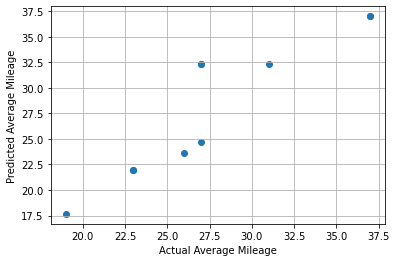

In [3]:
## Here we visualize the actuals vs predictions
## First we import the matplotlib library
import matplotlib.pyplot as plt

plt.scatter(autos_Y_test, predictions)
plt.xlabel('Actual Average Mileage')
plt.ylabel('Predicted Average Mileage')
plt.grid()
plt.show();

# Clustering

In [5]:
## Here we import the pandas library
import pandas as pd

## Here we read the data 
iris = pd.read_csv('iris_data.csv')

## First we need to standardize the data
from sklearn.preprocessing import StandardScaler

## Here we standardize the features
scaler = StandardScaler()
features_std = scaler.fit_transform(iris.iloc[:,0:4])

## Here we import the KMeans class from sklearn
from sklearn.cluster import KMeans

## Here we create a k-means object
three_clusters = KMeans(n_clusters = 3, n_init = 20)

## Here we cluster the data into three clusters
iris_three_clusters = three_clusters.fit(features_std)

## Here we can see the cluster labels
iris_three_clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Hierarchical clustering

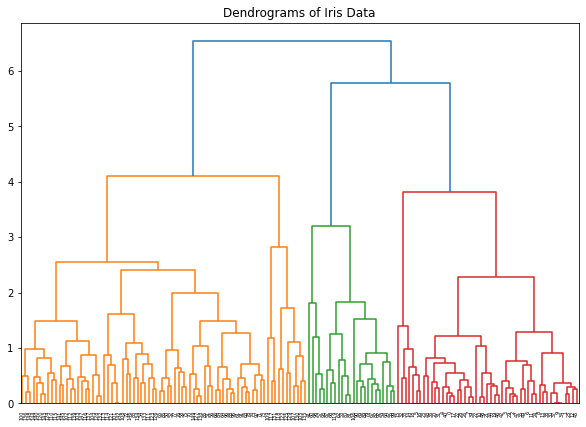

In [6]:
## Here we import the libraries
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

## Here we create the figure 
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of Iris Data")  

## Here we visualize the dendogram
dend = shc.dendrogram(shc.linkage(features_std, method = 'complete'))
plt.show();